In [1]:
import dask.array as da
from dask import delayed
from dask.array.image import imread

In [2]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [3]:
import scipy.linalg as la

In [4]:
from daskDMD import dmd_dask, dmd_evolve_dask, check_dmd_dask

In [5]:
%load_ext line_profiler

In [6]:
# path to bubbles
path = '/media/val/7AA2E24AA2E20A89/microbubbles/Test1/'
# this path contains only 20 tif images
path = 'test_data/microbubbles/'

In [7]:
video = imread(path+'*.tif')

In [8]:
(T, m, n) = video.shape

In [9]:
video.shape

(19, 800, 1280)

In [10]:
data = video.reshape((T,m*n))
data = data.T
data = data.rechunk((1000,T))

In [11]:
# subset if needed
data_small = data[:,:]

In [12]:
# run dmd
mu, Phi, s = dmd_dask(data_small,1,eig='dask')

Looking at the singular values, we see that one of them is way larger than the other ones: we hope that this mode corresponds to the background!

In [13]:
np.array(s)

array([ 6307212.64957361,    48739.33245341,    47308.35414858,
          45415.6558374 ,    45065.26297984,    44942.95866844,
          44847.34791902,    44391.79720623,    43880.15324779,
          43716.14869229,    43607.68406025,    43148.01553257,
          42695.68520413,    42525.11544108,    42210.4144885 ,
          41991.54450575,    41955.03875111,    41497.12160066])

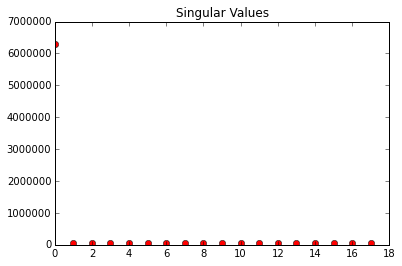

In [14]:
plt.plot(s[:],'ro')
plt.title('Singular Values')

In [15]:
# we can check if the selected modes are enough to reconstruct the video
check_dmd_dask(data_small,mu, Phi)

/home/val/MEGA/eScienceWork/projects/daskDMD/daskDMD.py:140: UserWarning: dmd result does not satisfy Y=AX
  warn('dmd result does not satisfy Y=AX')


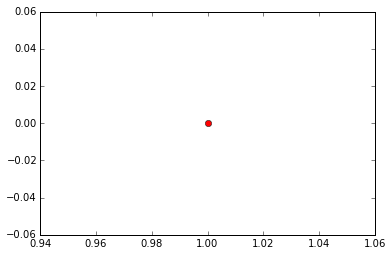

In [ ]:
plt.plot(np.real(mu),np.imag(mu),'ro')

In [ ]:
# evolving the components (this function is not fully in dask: it may cause trouble for big dimensions)
Psi = dmd_evolve_dask(data_small[:,0],mu,Phi,range(T))

In [ ]:
Phi.shape

In [ ]:
Psi.shape

In [ ]:
# projecting on the first mode
modeProj = np.dot(np.reshape(Phi[:,0],(1024000,1)),np.reshape(Psi[0,:],(1,19)))

In [ ]:
# reconstructing the video using the first mode
data_est = modeProj.reshape(m,n,T)

In [ ]:
# displaying the first frame of the background
plt.imshow(np.real(data_est[:,:,0]),cmap = 'gray')
plt.title('Background')

In [ ]:
# displaying the bubbles in the first frame
plt.imshow(np.real(np.abs(data_est[:,:,0] - video[0,:,:]).max() - np.abs(data_est[:,:,0]-video[0,:,:])),cmap = 'gray')
plt.title('Bubbles')